In [83]:
import urllib.request
import urllib.request
import json
import pandas as pd
import json

client_id = "NjCkeE5n21b4IPWLlbAi"
client_secret = "J6RWn6YJz8"

# ✨ 필요한 입력값
start_date = "2024-06-23"
end_date = "2025-06-23"
keywords = ["상지건설"]

# 🔧 요청 body 구성
body = {
    "startDate": start_date,
    "endDate": end_date,
    "timeUnit": "date",
    "keywordGroups": [
        {
            "groupName": keywords[0],
            "keywords": keywords
        }
    ],
    "device": "pc"
}

# 🔗 API 요청
url = "https://openapi.naver.com/v1/datalab/search"
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)
request.add_header("Content-Type", "application/json")

response = urllib.request.urlopen(request, data=json.dumps(body).encode("utf-8"))
rescode = response.getcode()

# 📦 결과 확인
if rescode == 200:
    response_body = response.read()
else:
    print("Error Code:" + str(rescode))

# 네이버 API 응답 결과를 문자열로 받은 경우 (예: response_body.decode('utf-8'))
response_text = response_body.decode('utf-8')  # 너가 올린 JSON 문자열을 여기에 붙여넣거나 response_body.decode('utf-8') 대입

# JSON 문자열을 파이썬 객체로 변환
data_json = json.loads(response_text)

# 관심 데이터 추출
data_list = data_json['results'][0]['data']  # 첫 번째 키워드 그룹의 데이터

# DataFrame 생성
df = pd.DataFrame(data_list)

# 'period'를 datetime 형식으로 변환하고 인덱스로 지정
df['날짜'] = pd.to_datetime(df['period'])
df.drop(columns='period', inplace=True)
df.set_index('날짜', inplace=True)

df.head(3)

,ratio
날짜,
2024-06-23,0.02636
2024-06-24,0.10254
2024-06-25,0.15821


In [ ]:
# from pykrx import stock
# import pandas as pd
# from datetime import datetime, timedelta
# def get_daily_returns(ticker, start_date="2022-01-01", end_date=None, save_csv=True):
#     """
#     한국 주식 티커의 일일 수익률을 계산하여 DataFrame 및 CSV로 저장합니다.
#     Parameters:
#     - ticker: str, 예: "005930" (삼성전자)
#     - start_date: str, "YYYY-MM-DD"
#     - end_date: str, "YYYY-MM-DD" (기본: 오늘)
#     - save_csv: bool, True면 CSV로 저장
#     Returns:
#     - DataFrame: 날짜별 수익률 포함
#     """
#     if end_date is None:
#         end_date = datetime.today().strftime("%Y-%m-%d")
#     # 1. 일별 OHLCV 데이터 가져오기
#     df = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
#     # 2. 수익률 계산 (전일 대비 수익률)
#     df['Return'] = df['종가'].pct_change()
#     # 3. 날짜 인덱스 리셋
#     df.reset_index(inplace=True)
#     # 4. 필요한 컬럼만 정리
#     df = df[['날짜', '종가', 'Return']]
#     # 5. 저장
#     if save_csv:
#         filename = f"{ticker}_daily_returns.csv"
#         df.to_csv(filename, index=False)
#         print(f"[✓] Saved to {filename}")
#     return df

# df1 = get_daily_returns("005930",start_date="2024-06-21")
# df1.head(3)

[✓] Saved to 005930_daily_returns.csv


,날짜,종가,Return
0,2024-06-21,80000,NaN
1,2024-06-24,80600,0.007500
2,2024-06-25,80800,0.002481


In [84]:
from pykrx import stock
import pandas as pd
from datetime import datetime

def get_daily_returns(ticker, start_date="2022-01-01", end_date=None, save_csv=True):
    """
    한국 주식 티커의 일일 수익률을 계산하여 DataFrame 및 CSV로 저장합니다.
    Parameters:
    - ticker: str, 예: "005930" (삼성전자)
    - start_date: str, "YYYY-MM-DD"
    - end_date: str, "YYYY-MM-DD" (기본: 오늘)
    - save_csv: bool, True면 CSV로 저장
    Returns:
    - DataFrame: 날짜별 수익률 포함
    """
    if end_date is None:
        end_date = datetime.today().strftime("%Y-%m-%d")
    # 1. 일별 OHLCV 데이터 가져오기
    df = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    # 2. 2일 뒤 종가 대비 수익률 계산
    df['Return'] = df['종가'].shift(1) / df['종가'] - 1
    # 3. 날짜 인덱스 리셋
    df.reset_index(inplace=True)
    # 4. 필요한 컬럼만 정리
    df = df[['날짜', '종가', 'Return']]
    # 5. 저장
    if save_csv:
        filename = f"{ticker}_2days_later_return.csv"
        df.to_csv(filename, index=False)
        print(f"[✓] Saved to {filename}")
    return df

df1 = get_daily_returns("042940", start_date="2024-06-21")
print(df1.tail(3))

[✓] Saved to 042940_2days_later_return.csv
            날짜     종가    Return
239 2025-06-19  14640  0.060109
240 2025-06-20  13810  0.060101
241 2025-06-23  13250  0.042264


In [85]:
df_reset = df.reset_index()

# 2. 날짜 컬럼 형식 통일 (datetime)
df_reset['날짜'] = pd.to_datetime(df_reset['날짜'])
df1['날짜'] = pd.to_datetime(df1['날짜'])

# 3. 날짜 기준으로 병합 (inner join)
df2 = pd.merge(df1, df_reset, on='날짜', how='inner')

df2.tail(3)

,날짜,종가,Return,ratio
237,2025-06-18,15520,-0.005155,2.91532
238,2025-06-19,14640,0.060109,2.42894
239,2025-06-20,13810,0.060101,2.65748


✅ 시차별 상관관계:
     Lag  Correlation
0    -3     0.451259
1    -2     0.495707
2    -1     0.555941
3     0     0.592895
4     1     0.493656
5     2     0.430028
6     3     0.382108
7     4     0.293797
8     5     0.326348
9     6     0.294256
10    7     0.214569

🎯 가장 높은 상관관계: lag 0일, 상관계수 = 0.5929


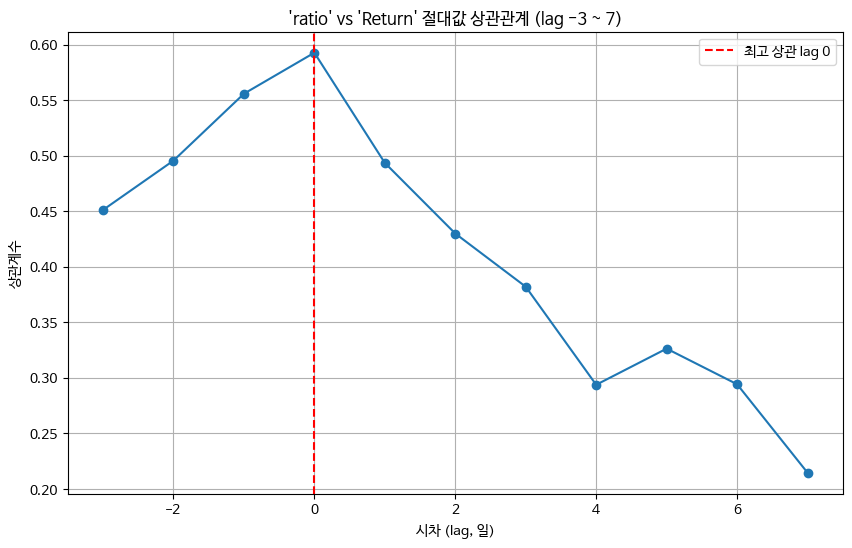

(    Lag  Correlation
 0    -3     0.451259
 1    -2     0.495707
 2    -1     0.555941
 3     0     0.592895
 4     1     0.493656
 5     2     0.430028
 6     3     0.382108
 7     4     0.293797
 8     5     0.326348
 9     6     0.294256
 10    7     0.214569,
 Lag            0.000000
 Correlation    0.592895
 Name: 3, dtype: float64)

In [86]:
def lagged_correlation_analysis_return_ratio(df, ratio_col='ratio', return_col='Return', date_col='날짜', min_lag=-3, max_lag=7):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])

    lag_results = []

    for lag in range(min_lag, max_lag + 1):
        temp_df = df.copy()

        # 시차에 따라 Return 절대값 시프트 (음수 lag: 과거 시점, 양수 lag: 미래 시점)
        temp_df[f'{return_col}_lag_{lag}'] = temp_df[return_col].shift(-lag).abs()
        
        # ratio, shifted Return 둘 다 결측치 제거
        clean_df = temp_df.dropna(subset=[ratio_col, f'{return_col}_lag_{lag}'])

        corr = clean_df[ratio_col].corr(clean_df[f'{return_col}_lag_{lag}'])
        lag_results.append({'Lag': lag, 'Correlation': corr})

    lag_corr_df = pd.DataFrame(lag_results)

    best_row = lag_corr_df.loc[lag_corr_df['Correlation'].abs().idxmax()]

    print("✅ 시차별 상관관계:\n", lag_corr_df)
    print(f"\n🎯 가장 높은 상관관계: lag {int(best_row['Lag'])}일, 상관계수 = {best_row['Correlation']:.4f}")

    plt.figure(figsize=(10,6))
    plt.plot(lag_corr_df['Lag'], lag_corr_df['Correlation'], marker='o', linestyle='-')
    plt.axvline(best_row['Lag'], color='red', linestyle='--', label=f"최고 상관 lag {int(best_row['Lag'])}")
    plt.title(f"'{ratio_col}' vs '{return_col}' 절대값 상관관계 (lag {min_lag} ~ {max_lag})")
    plt.xlabel("시차 (lag, 일)")
    plt.ylabel("상관계수")
    plt.legend()
    plt.grid(True)
    plt.show()

    return lag_corr_df, best_row

lagged_correlation_analysis_return_ratio(df2, ratio_col='ratio', return_col='Return', date_col='날짜', min_lag=-3, max_lag=7)

In [87]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
import time

def generate_date_range(start_date: str, end_date: str) -> list:
    """날짜 범위 생성 함수"""
    start = datetime.strptime(start_date, "%Y.%m.%d")
    end = datetime.strptime(end_date, "%Y.%m.%d")
    return [(start + timedelta(days=i)).strftime("%Y.%m.%d") for i in range((end - start).days + 1)]

def get_all_posts_by_date_range(code, start_date, end_date, page_step=10, max_limit=100):
    """네이버 금융 게시글 크롤링 함수"""
    target_dates = set(generate_date_range(start_date, end_date))
    base_url = "https://finance.naver.com"
    headers = {'User-Agent': 'Mozilla/5.0'}
    filtered_data = []
    collected_dates = set()
    current_page = 1
    max_page = page_step

    while not target_dates.issubset(collected_dates):
        new_data_found = False  # 새 글 탐지 여부
        for page in range(current_page, max_page + 1):
            list_url = f"{base_url}/item/board.naver?code={code}&page={page}"
            res = requests.get(list_url, headers=headers)
            res.encoding = 'euc-kr'
            soup = BeautifulSoup(res.text, 'html.parser')

            rows = soup.select("table.type2 tr")
            date_tags = soup.select("span.tah.p10.gray03")
            raw_texts = [span.get_text(strip=True) for span in date_tags]
            dates_only = [raw_texts[i].split()[0] for i in range(0, len(raw_texts), 2)]

            if not dates_only:
                print(f":warning: 페이지 {page}에서 더 이상 게시글 없음. 종료합니다.")
                return pd.DataFrame(filtered_data)

            date_index = 0
            for row in rows:
                tds = row.find_all("td")
                if len(tds) < 5:
                    continue

                a_tag = tds[1].find("a")
                if not a_tag or not a_tag.has_attr('href'):
                    continue

                title = a_tag['title']
                href = a_tag['href']
                detail_url = base_url + href

                if date_index >= len(dates_only):
                    continue

                post_date = dates_only[date_index]
                date_index += 1

                if post_date in target_dates:
                    new_data_found = True
                    post_res = requests.get(detail_url, headers=headers)
                    post_res.encoding = 'euc-kr'
                    post_soup = BeautifulSoup(post_res.text, 'html.parser')
                    content_div = post_soup.select_one("div.view_se")
                    content = content_div.get_text(strip=True) if content_div else "본문 없음"

                    filtered_data.append({
                        "날짜": post_date,
                        "제목": title,
                        "본문": content,
                        "링크": detail_url
                    })

                    collected_dates.add(post_date)
                    time.sleep(0.1)

        if not new_data_found:
            print(":white_check_mark: 더 이상 수집할 새로운 데이터 없음. 종료합니다.")
            break

        current_page = max_page + 1
        max_page += page_step

        if max_page > max_limit:
            print(f":no_entry_sign: 최대 페이지 제한({max_limit}) 도달. 중단합니다.")
            break

    return pd.DataFrame(filtered_data)

def save_crawled_data(df, code, start_date, end_date):
    """크롤링된 데이터를 파일로 저장"""
    filename = f"crawled_data_{code}_{start_date.replace('.', '')}_{end_date.replace('.', '')}.csv"
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"크롤링 데이터가 {filename}에 저장되었습니다.")
    return filename

if __name__ == "__main__":
    print("=== 네이버 금융 게시글 크롤러 ===")
    
    code = input("종목 코드를 입력하세요 (예: 005930): ").strip()
    start_date = input("시작 날짜를 입력하세요 (예: 2025.06.20): ").strip()
    end_date = input("끝 날짜를 입력하세요 (예: 2025.06.23): ").strip()

    print(f"\n{code} 종목의 {start_date} ~ {end_date} 기간 게시글을 크롤링합니다...")
    
    df = get_all_posts_by_date_range(code, start_date, end_date)
    
    if not df.empty:
        filename = save_crawled_data(df, code, start_date, end_date)
        print(f"\n크롤링 완료! 총 {len(df)}개의 게시글을 수집했습니다.")
        print(f"파일명: {filename}")
    else:
        print("크롤링된 데이터가 없습니다.") 

=== 네이버 금융 게시글 크롤러 ===

042940 종목의 2025.06.05 ~ 2025.06.23 기간 게시글을 크롤링합니다...
:no_entry_sign: 최대 페이지 제한(100) 도달. 중단합니다.
크롤링 데이터가 crawled_data_042940_20250605_20250623.csv에 저장되었습니다.

크롤링 완료! 총 1863개의 게시글을 수집했습니다.
파일명: crawled_data_042940_20250605_20250623.csv


한글 폰트 설정 완료: C:\Windows\Fonts\NGULIM.TTF
=== 한국어 감성분석 도구 ===
사용 가능한 한국어 감성분석 모델:
1. klue/roberta-base
2. beomi/KcELECTRA-base
3. beomi/KcELECTRA-base-v2
4. snunlp/KR-FinBert-SC
5. monologg/koelectra-base-v3-discriminator

선택된 모델: snunlp/KR-FinBert-SC
크롤링된 파일 목록:
1. crawled_data_042940_20250520_20250624.csv

선택된 파일: crawled_data_042940_20250520_20250624.csv
사용 중인 디바이스: cpu
감성분석 모델을 로딩 중입니다...


tokenizer_config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

c:\anaconda\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hoon\.cache\huggingface\hub\models--snunlp--KR-FinBert-SC. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/143k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/294k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/406M [00:00<?, ?B/s]

모델 로딩 완료!
사용 중인 모델: snunlp/KR-FinBert-SC
crawled_data_042940_20250520_20250624.csv 파일에서 감성분석을 시작합니다...


감성분석 진행률:   1%|          | 19/1864 [00:01<02:13, 13.86it/s]

model.safetensors:   0%|          | 0.00/406M [00:00<?, ?B/s]

감성분석 진행률: 100%|██████████| 1864/1864 [02:59<00:00, 10.40it/s]


감성분석 결과가 crawled_data_042940_20250520_20250624_with_korean_sentiment.csv에 저장되었습니다.

📊 한국어 감성분석 상세 결과

1️⃣ 전체 감성분석 요약
감성
중립    1646
부정     154
긍정      64
Name: count, dtype: int64
평균 감성점수: -0.042
평균 신뢰도: 0.940

2️⃣ 날짜별 감성분석
            평균감성점수  게시글수  평균신뢰도                             감성분포
날짜                                                              
2025.06.08  -0.990     1  0.990                        {'부정': 1}
2025.06.09  -0.029   216  0.943   {'중립': 197, '부정': 14, '긍정': 5}
2025.06.10  -0.076   211  0.956   {'중립': 182, '부정': 23, '긍정': 6}
2025.06.11  -0.011   140  0.925    {'중립': 125, '부정': 8, '긍정': 7}
2025.06.12  -0.066   340  0.932  {'중립': 287, '부정': 39, '긍정': 14}
2025.06.13  -0.033   281  0.939   {'중립': 256, '부정': 18, '긍정': 7}
2025.06.14  -0.036    16  0.935              {'중립': 15, '부정': 1}
2025.06.15   0.014    16  0.971     {'중립': 14, '긍정': 1, '부정': 1}
2025.06.16  -0.016   136  0.934    {'중립': 127, '부정': 6, '긍정': 3}
2025.06.17  -0.015    99  0.929     {'중립': 86, '부정': 7, '긍정': 

C:\Users\hoon\AppData\Local\Temp\ipykernel_27560\1167905024.py:348: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hoon\AppData\Local\Temp\ipykernel_27560\1167905024.py:348: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hoon\AppData\Local\Temp\ipykernel_27560\1167905024.py:348: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hoon\AppData\Local\Temp\ipykernel_27560\1167905024.py:348: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hoon\AppData\Local\Temp\ipykernel_27560\1167905024.py:348: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hoon\AppData\Local\Temp\ipykernel_27560\1167905024.py:348: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) Arial.
  plt.tight_

시각화가 'korean_sentiment_analysis_results.png'에 저장되었습니다.


c:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54

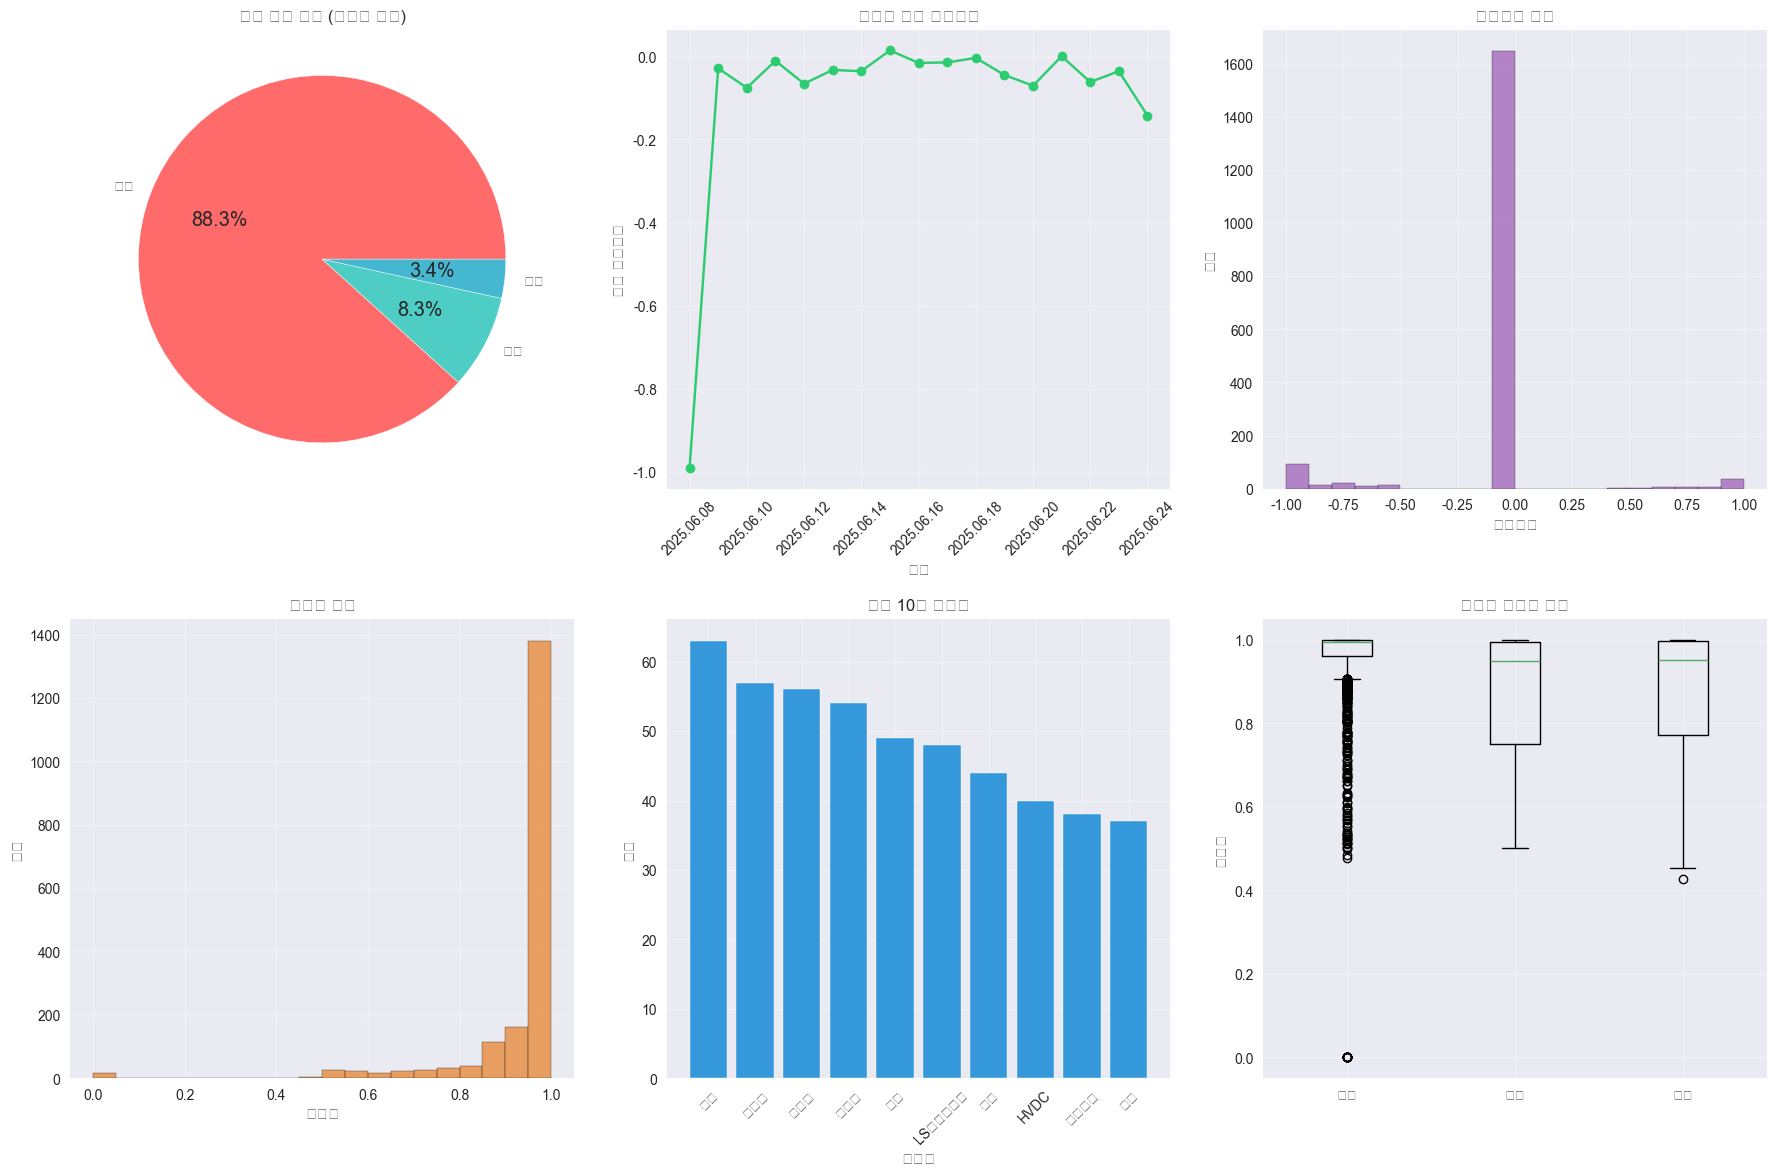